In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data_train = pd.read_csv('/content/drive/My Drive/Kaggle/train_house.csv')
data_test = pd.read_csv('/content/drive/My Drive/Kaggle/test_house.csv')

In [3]:
print(data_train.columns)
features = data_train.columns
print(data_train['MSZoning'].dtypes)
print(data_train[features[0]])

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
import numpy as np
import pandas as pd

def hot_encoding(col_name,data):
    for i in range(0,len(col_name)):
        unique= pd.unique(data[col_name[i]])
        unique = [x for x in unique if x == x]
        for j in range(0,len(unique)):
            arr = np.zeros(len(data[col_name[i]]))
            arr[np.where(unique[j] == data[col_name[i]])[0]] = 1
            df1 = pd.DataFrame(arr,columns= [unique[j]])
            data= pd.concat([data,df1], axis = 1)
        data = data.drop(col_name[i], axis = 1)
    return data

categorical_var= []

features = list(data_train.columns)

for i in range(0,len(features)):
  if data_train[features[i]].dtypes == 'object':
    categorical_var.append(features[i])

data_train_c = hot_encoding(categorical_var, data_train)
data_test_c = hot_encoding(categorical_var, data_test)

features.remove('SalePrice')
features.remove('Id')

for i in range(0,len(features)):
  if features[i] not in categorical_var:
    data_train_c[features[i]] = data_train_c[features[i]].replace(np.nan,np.mean(data_train_c[features[i]]))
    data_test_c[features[i]] = data_test_c[features[i]].replace(np.nan,np.mean(data_test_c[features[i]]))

features_c = list(data_train_c.columns)
features_c.remove('SalePrice')
features_c.remove('Id')
print(features_c)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'RL', 'RM', 'C (all)', 'FV', 'RH', 'Pave', 'Grvl', 'Grvl', 'Pave', 'Reg', 'IR1', 'IR2', 'IR3', 'Lvl', 'Bnk', 'Low', 'HLS', 'AllPub', 'NoSeWa', 'Inside', 'FR2', 'Corner', 'CulDSac', 'FR3', 'Gtl', 'Mod', 'Sev', 'CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste', 'Norm', 'Feedr', 'PosN',

In [ ]:
print(len(features_c))

288


In [5]:
###Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data_train_c[features_c],data_train_c["SalePrice"], test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=150, max_depth=200, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions, y_test)
output = pd.DataFrame({'actual price': y_test, 'price': predictions, '% err': 100*np.abs(predictions-y_test)/y_test})
err = np.sum(np.abs(np.array(y_test)  - np.array(predictions)))/len(y_test)
print(1-err)

-17918.098721461185


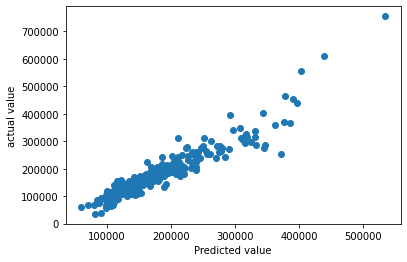

In [8]:
import matplotlib.pyplot as plt

plt.scatter(predictions, y_test)
plt.xlabel('Predicted value')
plt.ylabel('actual value')

plt.show()

In [9]:
print(output)

print(np.sum(100*np.abs(predictions-y_test)/y_test)/ len(y_test))

      actual price          price      % err
892         154500  141533.000000   8.392880
1105        325000  316655.733333   2.567467
413         115000  115047.166667   0.041014
522         159000  150437.000000   5.385535
1036        315500  319031.033333   1.119186
...            ...            ...        ...
479          89471  118092.333333  31.989509
1361        260000  233517.033333  10.185756
802         189000  175164.153333   7.320554
651         108000  138242.006667  28.001858
722         124500  116991.666667   6.030790

[292 rows x 3 columns]
10.70415919537036
